In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv('earthquakes.csv', skipinitialspace=True, on_bad_lines='skip')

# Remove leading/trailing whitespace from all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

print(df.head())



         Date   Time  Latitude  Longitude  Magnitude         Epicenter
0  2012-01-11  08:59     28.89      81.89        4.2           Dailekh
1  2012-01-18  11:16     26.63      86.40        4.5            Siraha
2  2012-01-19  00:46     29.73      81.91        4.6             Humla
3  2012-01-24  04:07     26.84      86.43        4.0            Siraha
4  2012-02-05  20:06     27.25      88.07        4.0  Panchthar/Sikkim


In [5]:

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
# Sort the DataFrame by the combined datetime column
df = df.sort_values('Datetime')

# Compute the gap in days between consecutive earthquake events
df['DaysGap'] = df['Datetime'].diff().dt.days

# Display the updated DataFrame
print(df[['Datetime', 'DaysGap']].head())

print(df.head())



             Datetime  DaysGap
0 2012-01-11 08:59:00      NaN
1 2012-01-18 11:16:00      7.0
2 2012-01-19 00:46:00      0.0
3 2012-01-24 04:07:00      5.0
4 2012-02-05 20:06:00     12.0
         Date   Time  Latitude  Longitude  Magnitude         Epicenter  \
0  2012-01-11  08:59     28.89      81.89        4.2           Dailekh   
1  2012-01-18  11:16     26.63      86.40        4.5            Siraha   
2  2012-01-19  00:46     29.73      81.91        4.6             Humla   
3  2012-01-24  04:07     26.84      86.43        4.0            Siraha   
4  2012-02-05  20:06     27.25      88.07        4.0  Panchthar/Sikkim   

             Datetime  Month  Hour  DayOfWeek  DaysGap  
0 2012-01-11 08:59:00    1.0   8.0        2.0      NaN  
1 2012-01-18 11:16:00    1.0  11.0        2.0      7.0  
2 2012-01-19 00:46:00    1.0   0.0        3.0      0.0  
3 2012-01-24 04:07:00    1.0   4.0        1.0      5.0  
4 2012-02-05 20:06:00    2.0  20.0        6.0     12.0  


### **EDA**

In [6]:
print(df.isnull().sum())


Date           0
Time           0
Latitude       0
Longitude      0
Magnitude      0
Epicenter      0
Datetime     280
Month        280
Hour         280
DayOfWeek    280
DaysGap      281
dtype: int64


In [7]:
print(df.describe())


         Latitude   Longitude   Magnitude                       Datetime  \
count  887.000000  887.000000  887.000000                            607   
mean    28.188151   84.791218    4.312965  2018-04-10 04:23:51.696869888   
min     26.120000   80.100000    4.000000            2012-01-11 08:59:00   
25%     27.720000   84.095000    4.000000            2015-07-01 23:52:00   
50%     27.910000   85.530000    4.100000            2017-01-03 06:41:00   
75%     28.325000   86.070000    4.500000            2021-10-01 22:41:00   
max     30.370000   88.510000    7.600000            2024-12-31 02:09:00   
std      0.744283    1.930719    0.474997                            NaN   

            Month        Hour   DayOfWeek     DaysGap  
count  607.000000  607.000000  607.000000  606.000000  
mean     6.652389   10.906096    2.922570    7.420792  
min      1.000000    0.000000    0.000000    0.000000  
25%      4.000000    5.000000    1.000000    0.000000  
50%      7.000000   10.000000    3.

In [8]:
print(df['Epicenter'].value_counts())
print(df['Month'].value_counts())


Epicenter
Dolakha                                             187
Sindhupalchowk                                      114
Bajhang                                              60
Dhading                                              49
Gorkha                                               43
                                                   ... 
Ilam                                                  1
JaJarkot                                              1
Around Annapurna II (Border of Kaski and Manang)      1
kavre                                                 1
Lalitput                                              1
Name: count, Length: 74, dtype: int64
Month
6.0     81
10.0    73
7.0     63
4.0     58
8.0     54
11.0    51
5.0     48
1.0     39
2.0     38
9.0     36
3.0     35
12.0    31
Name: count, dtype: int64


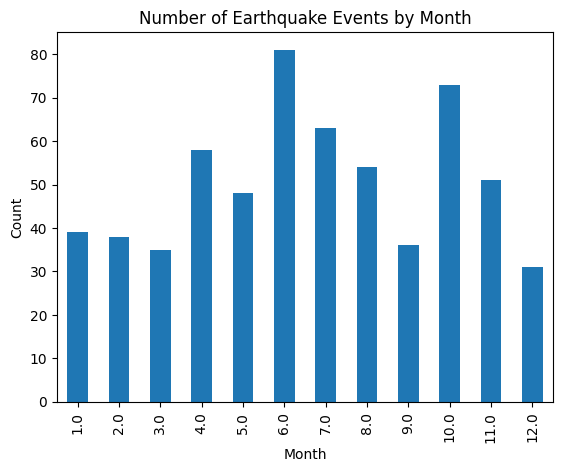

In [9]:

df.groupby('Month').size().plot(kind='bar')
plt.title('Number of Earthquake Events by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


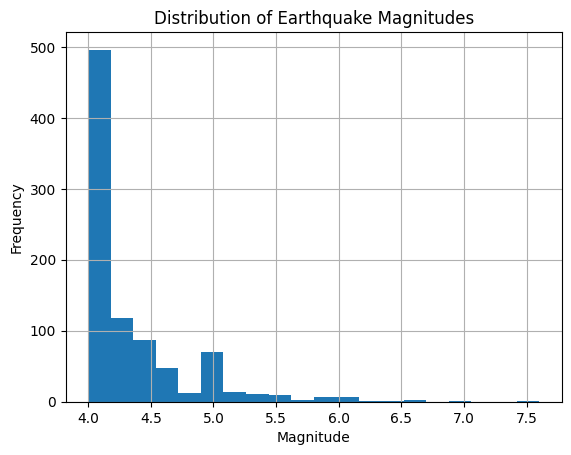

In [10]:
df['Magnitude'].hist(bins=20)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


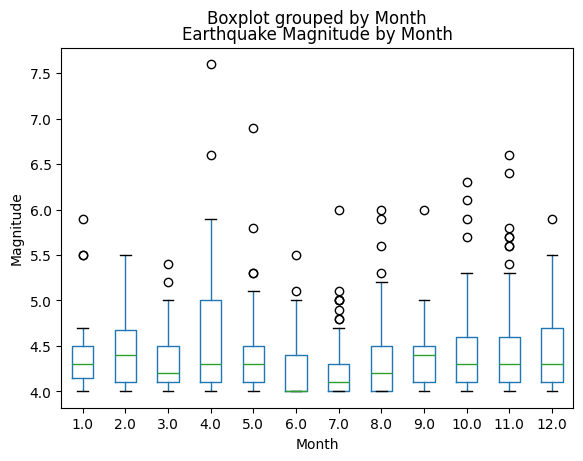

In [11]:
df.boxplot(column='Magnitude', by='Month', grid=False)
plt.title('Earthquake Magnitude by Month')
plt.xlabel('Month')
plt.ylabel('Magnitude')
plt.show()

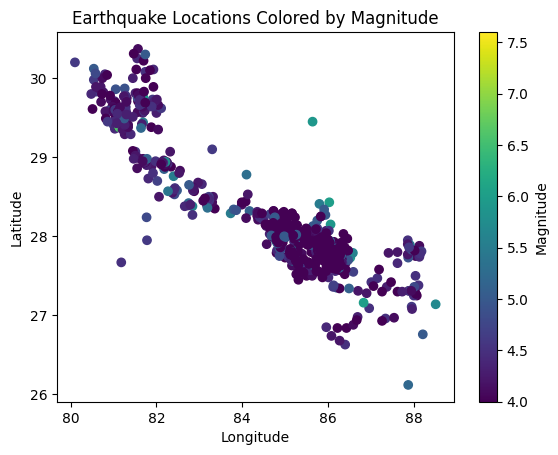

In [12]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Magnitude'], cmap='viridis')
plt.title('Earthquake Locations Colored by Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Magnitude')
plt.show()


In [13]:
corr_matrix = df[['Latitude', 'Longitude', 'Magnitude', 'Month', 'Hour', 'DayOfWeek']].corr()
print(corr_matrix)


           Latitude  Longitude  Magnitude     Month      Hour  DayOfWeek
Latitude   1.000000  -0.924684   0.162744  0.096256  0.001529  -0.054460
Longitude -0.924684   1.000000  -0.149850 -0.121969 -0.021086   0.048503
Magnitude  0.162744  -0.149850   1.000000  0.029955  0.050435   0.042919
Month      0.096256  -0.121969   0.029955  1.000000  0.006579  -0.042655
Hour       0.001529  -0.021086   0.050435  0.006579  1.000000   0.033579
DayOfWeek -0.054460   0.048503   0.042919 -0.042655  0.033579   1.000000


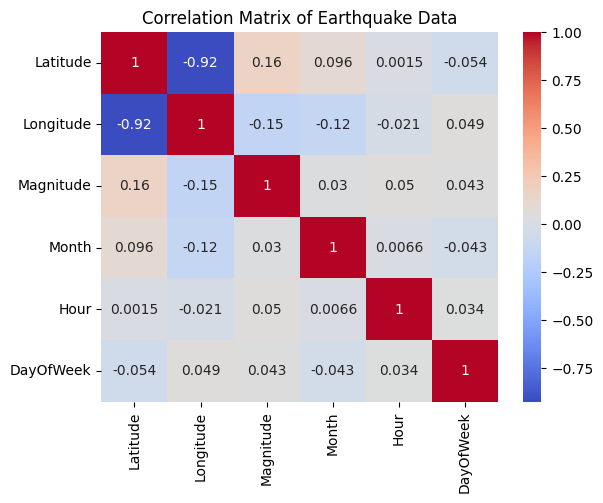

In [14]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Earthquake Data')
plt.show()


count    606.000000
mean       7.420792
std       12.812681
min        0.000000
25%        0.000000
50%        3.000000
75%       10.000000
max      148.000000
Name: DaysGap, dtype: float64


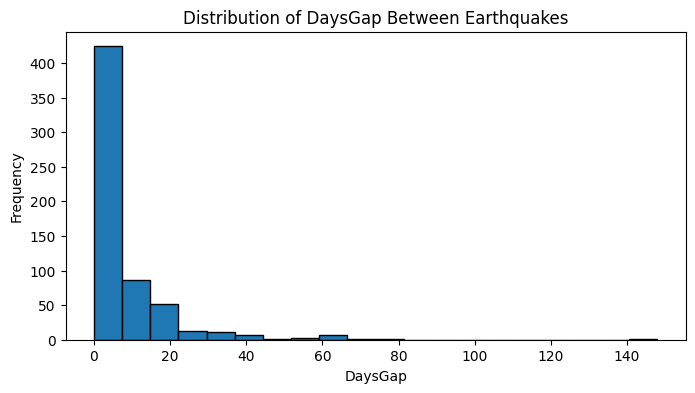

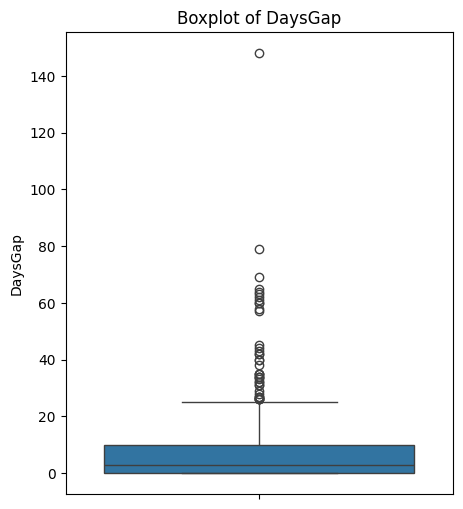

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display summary statistics for DaysGap
print(df['DaysGap'].describe())

# Histogram of DaysGap
plt.figure(figsize=(8, 4))
plt.hist(df['DaysGap'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of DaysGap Between Earthquakes')
plt.xlabel('DaysGap')
plt.ylabel('Frequency')
plt.show()

# Boxplot of DaysGap using seaborn
plt.figure(figsize=(5, 6))
sns.boxplot(y=df['DaysGap'].dropna())
plt.title('Boxplot of DaysGap')
plt.ylabel('DaysGap')
plt.show()


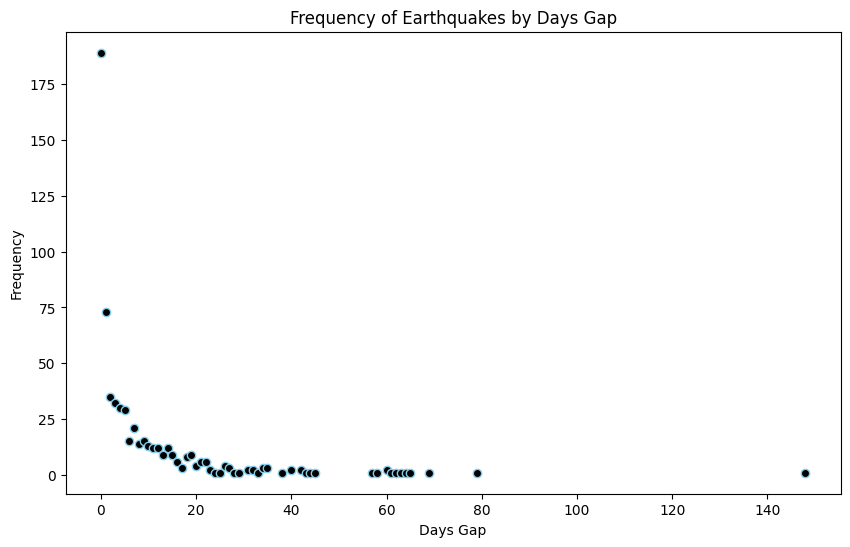

In [19]:
import matplotlib.pyplot as plt

# Calculate frequency of each unique DaysGap
daysgap_counts = df['DaysGap'].value_counts().sort_index()

# Plot the chart using points
plt.figure(figsize=(10, 6))
plt.plot(daysgap_counts.index, daysgap_counts.values, 'o', color='skyblue', markerfacecolor='black')
plt.xlabel('Days Gap')
plt.ylabel('Frequency')
plt.title('Frequency of Earthquakes by Days Gap')
plt.show()



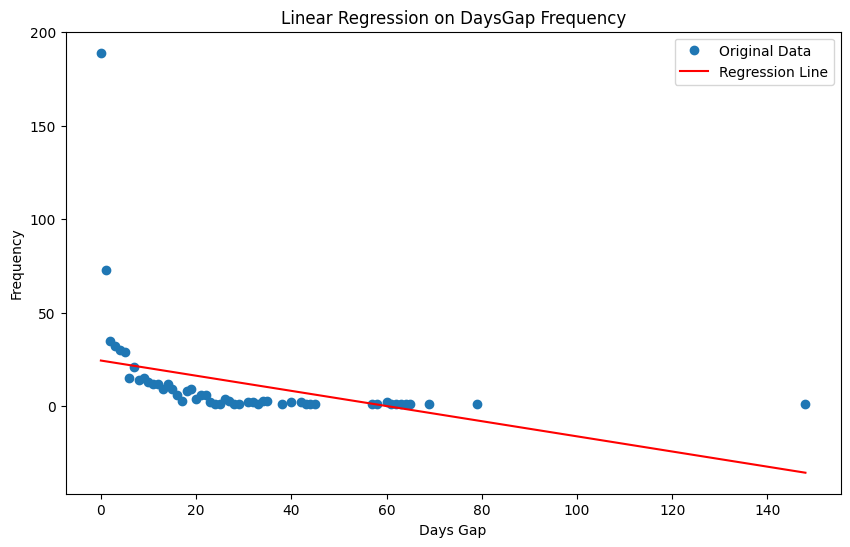

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Use the frequency data computed earlier
daysgap_counts = df['DaysGap'].value_counts().sort_index()

# Prepare the independent variable (DaysGap) and dependent variable (Frequency)
X = np.array(daysgap_counts.index).reshape(-1, 1)  # Predictor
y = daysgap_counts.values  # Response

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict frequency values using the fitted model
y_pred = model.predict(X)

# Plot original data as points and the regression line
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Original Data')
plt.plot(X, y_pred, 'r-', label='Regression Line')
plt.xlabel('Days Gap')
plt.ylabel('Frequency')
plt.title('Linear Regression on DaysGap Frequency')
plt.legend()
plt.show()


In [26]:
import numpy as np

# Assume the user provides a number of days (for example, 10 days)
user_days_gap = 50


# Empirical approach: Calculate cumulative probability from historical data
daysgap_counts = df['DaysGap'].value_counts().sort_index()
total_counts = daysgap_counts.sum()

# Sum frequencies for all gaps less than or equal to the user-provided days gap
empirical_probability = daysgap_counts[daysgap_counts.index <= user_days_gap].sum() / total_counts

# Exponential model approach: Estimate probability using an exponential distribution
mean_gap = df['DaysGap'].mean()  # Average gap in days
lambda_val = 1 / mean_gap        # Rate parameter of the exponential distribution
exponential_probability = 1 - np.exp(-lambda_val * user_days_gap)

print("Empirical probability that an earthquake occurs within", user_days_gap, "days:", empirical_probability)
print("Exponential model probability that an earthquake occurs within", user_days_gap, "days:", exponential_probability)


Empirical probability that an earthquake occurs within 50 days: 0.9801980198019802
Exponential model probability that an earthquake occurs within 50 days: 0.998814778043429


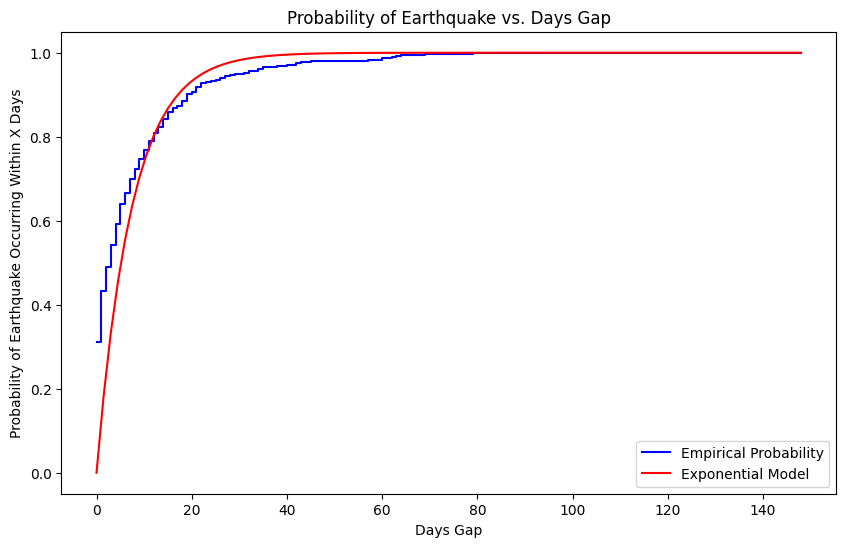

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate frequency of each unique DaysGap
daysgap_counts = df['DaysGap'].value_counts().sort_index()
total_counts = daysgap_counts.sum()

# Create the empirical cumulative probability (step function)
empirical_x = np.sort(daysgap_counts.index)
empirical_prob = np.cumsum(daysgap_counts.sort_index().values) / total_counts

# Create x values for the exponential model (continuous range)
x = np.linspace(0, empirical_x.max(), 100)
mean_gap = df['DaysGap'].mean()
lambda_val = 1 / mean_gap
exponential_prob = 1 - np.exp(-lambda_val * x)

# Plot both the empirical and exponential probabilities
plt.figure(figsize=(10, 6))
plt.step(empirical_x, empirical_prob, where='post', label='Empirical Probability', color='blue')
plt.plot(x, exponential_prob, label='Exponential Model', color='red')
plt.xlabel('Days Gap')
plt.ylabel('Probability of Earthquake Occurring Within X Days')
plt.title('Probability of Earthquake vs. Days Gap')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Prompt user for input (ensure it is converted to a float/int)
user_days_gap = float(input("Enter the number of days: "))

# Calculate frequency of each unique DaysGap
daysgap_counts = df['DaysGap'].value_counts().sort_index()
total_counts = daysgap_counts.sum()

# Empirical probability: sum frequencies for all gaps <= user_days_gap
empirical_probability = daysgap_counts[daysgap_counts.index <= user_days_gap].sum() / total_counts

# Exponential model: calculate probability using the exponential CDF
mean_gap = df['DaysGap'].mean()
lambda_val = 1 / mean_gap
exponential_probability = 1 - np.exp(-lambda_val * user_days_gap)

# Output the results
print(f"Empirical probability for an earthquake within {user_days_gap} days: {empirical_probability:.4f}")
print(f"Exponential model probability for an earthquake within {user_days_gap} days: {exponential_probability:.4f}")


Empirical probability for an earthquake within 90.0 days: 0.9983
Exponential model probability for an earthquake within 90.0 days: 1.0000
